In [6]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

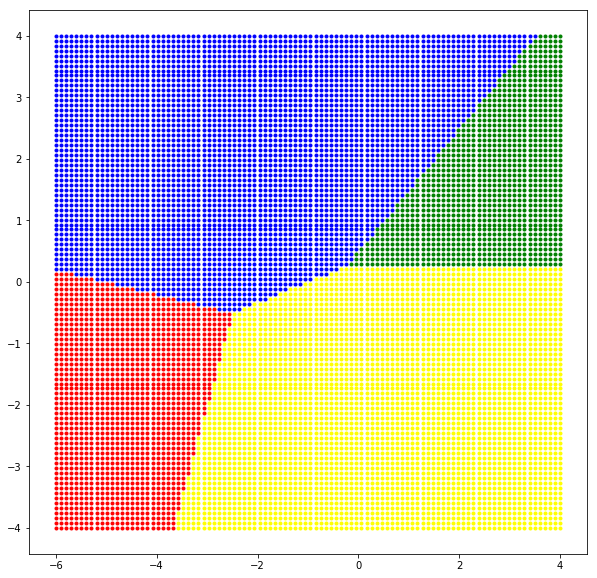

In [8]:
"""
Understanding how a single layer in a neural network might work
- h1 = a1 x1 + a2 x2
- h2 = b1 x1 + b2 x2
- h3 = c1 x1 + c2 x2

Therefore you get three separations:
- h1 > h2 when (a1 - b1) x1 + (a2 - b2) x2 > 0
- h1 > h3 when (a1 - c1) x1 + (a2 - c2) x2 > 0
- h2 > h3 when (b1 - c1) x1 + (b2 - c2) x2 > 0

These lines necessarily cross in one point:
Because when h1 > h2 and h1 > h3 cross, it means that h1 = h2 = h3

=> So we have one point from which 3 lines go.

When we have 4 probabilities, this does not apply anymore, but it seems
we have at most 4 regions of space (TODO - prove it)
"""

"""
Doing the same but with Softmax (and only consider a classification if higher than 50%)
"""

weights = [
    np.array([1, 2, 1]),
    np.array([3, 0, 2]),
    np.array([0, -3, -4]),
    np.array([3, -4, 3])
]

xs = [[] for _ in range(len(weights))]
ys = [[] for _ in range(len(weights))]

for x in np.linspace(-6, 4, 100):
    for y in np.linspace(-4, 4, 100):
        point = np.array([x, y, 1])
        outputs = np.array([np.dot(point, w) for w in weights])
        index = outputs.argmax()
        xs[index].append(x)
        ys[index].append(y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs[0], ys[0], color='blue', marker='.')
ax.scatter(xs[1], ys[1], color='green', marker='.')
ax.scatter(xs[2], ys[2], color='red', marker='.')
ax.scatter(xs[3], ys[3], color='yellow', marker='.')
plt.show()

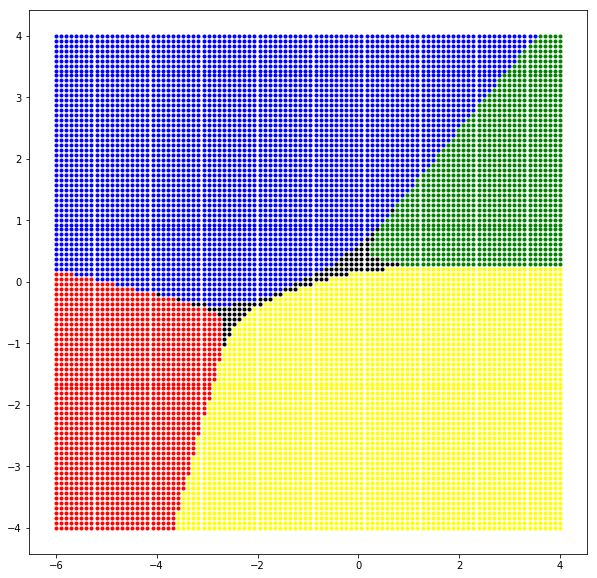

In [9]:
"""
Doing the same but with Softmax (and only consider a classification if higher than 50%)
"""

weights = [
    np.array([1, 2, 1]),
    np.array([3, 0, 2]),
    np.array([0, -3, -4]),
    np.array([3, -4, 3])
]

xs = [[] for _ in range(len(weights))]
ys = [[] for _ in range(len(weights))]
unknown_xs = []
unknown_ys = []

softmax = nn.Softmax(dim=0)

for x in np.linspace(-6, 4, 100):
    for y in np.linspace(-4, 4, 100):
        point = np.array([x, y, 1])
        outputs = [np.dot(point, w) for w in weights]
        probabilities = softmax(torch.FloatTensor(outputs))
        index = probabilities.argmax().item()
        if probabilities[index] >= 0.5:
            xs[index].append(x)
            ys[index].append(y)
        else:
            unknown_xs.append(x)
            unknown_ys.append(y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs[0], ys[0], color='blue', marker='.')
ax.scatter(xs[1], ys[1], color='green', marker='.')
ax.scatter(xs[2], ys[2], color='red', marker='.')
ax.scatter(xs[3], ys[3], color='yellow', marker='.')
ax.scatter(unknown_xs, unknown_ys, color='black', marker='.')
plt.show()